In [2]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_53232/2811761870.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
tobin1 = pd.read_csv('1기_시가총액tobinQ증가율까지(t년).csv')
tobin2 = pd.read_csv('2기_시가총액tobinQ증가율까지(t년).csv')

# e1_grade = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# s1_grade = pd.read_csv('csv/재무비율/최종/등급/사회_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# g1_grade = pd.read_csv('csv/재무비율/최종/등급/지배구조_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# t1_grade = pd.read_csv('csv/재무비율/최종/등급/통합등급_1기_등급(t+1).csv', index_col=0).reset_index(drop=True)
# esg2_grade = pd.read_csv('csv/재무비율/최종/등급/esg2기_등급(t+1).csv', index_col=0).reset_index(drop=True)

e1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/환경_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
s1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/사회_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
g1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/지배구조_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
t1_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/통합등급_1기_등급차이포함.csv', index_col=0).reset_index(drop=True)
esg2_grade_sub = pd.read_csv('csv/재무비율/최종/등급차이/esg2기_등급차이포함.csv', index_col=0).reset_index(drop=True)

test = pd.merge(esg2_grade_sub, tobin2, on=['종목명','업종명','회계연도'])

In [4]:
e_feature = pd.read_csv('csv/feature/feature_환경.csv', index_col=0)
s_feature = pd.read_csv('csv/feature/feature_사회.csv', index_col=0)
g_feature = pd.read_csv('csv/feature/feature_지배구조.csv', index_col=0)
t_feature = pd.read_csv('csv/feature/feature_통합.csv', index_col=0)

In [30]:
test.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이', 't년_시가총액', 't년_tobinQ',
       't년대비 t+1년 tobinQ 증가율', 't년대비 t+1년 시가총액 증가율'],
      dtype='object')

In [5]:
test_feature = test.loc[:, ~test.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급차이', '사회_등급차이', '지배구조_등급차이', '통합_등급차이', 't년_시가총액', 't년_tobinQ',
       't년대비 t+1년 tobinQ 증가율', 't년대비 t+1년 시가총액 증가율'])]
test_feature


,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),유형자산(천원),부채및자본총계(천원),총부채(천원),유동부채(천원),매입채무(천원),단기차입금(천원),...,유동부채(천원)_증가율(%),총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율
0,4.152092e+09,1.185255e+09,243210194,236961655,1.476614e+09,4.152092e+09,2.889430e+09,1611669523,275930960,697378057,...,2.950403,-11.698180,-30.311267,-268.691990,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745
1,4.548737e+09,1.352749e+09,287334993,375434184,1.634149e+09,4.548737e+09,3.346377e+09,1873942575,353029488,794593961,...,16.273377,-4.775846,20.905618,-25.203638,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606
2,4.985366e+09,1.578818e+09,332397459,357702292,1.819268e+09,4.985366e+09,3.721997e+09,2366670547,316428299,826452036,...,26.293654,5.074167,19.580777,-86.831318,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722
3,6.791349e+08,1.163563e+08,4338337,34704886,6.143262e+07,6.791349e+08,2.264668e+08,121169201,3752236,38809978,...,10.778585,4.222752,-5.115012,-1.935364,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733
4,6.844345e+08,1.333390e+08,4923098,30955006,6.903699e+07,6.844345e+08,2.026222e+08,130677557,3855973,28227391,...,7.847172,6.438325,1.595492,16.435303,63.277494,0.843629,-85.617341,0.240265,0.341307,0.811589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,9.519209e+08,4.119306e+08,94258672,236068035,4.607221e+08,9.519209e+08,3.255210e+08,175550684,54500020,100478596,...,40.617685,51.134870,68.622373,258.007480,339.603512,-86.463751,-103.207569,0.647644,0.984204,1.893904
1514,1.206374e+09,6.405798e+08,153866354,197585910,4.889362e+08,1.206374e+09,2.971932e+08,195447063,54402901,84239449,...,11.333695,45.143770,67.220476,357.524683,497.976681,7104.662386,-4166.675067,0.854564,1.133904,3.468866
1515,2.867760e+08,5.909465e+07,1596076,7553389,1.797536e+08,2.867760e+08,3.130598e+08,152820982,11344824,12525452,...,-24.475943,-185.007728,-12.947450,-53.110598,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095
1516,2.472987e+08,5.526361e+07,3993001,6823665,1.421733e+08,2.472987e+08,1.443589e+08,26670341,8879328,0,...,-82.547985,-491.646312,-8.111781,-67.664078,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119


In [6]:
def change(x) :
    if x >= -1.5 :
        return 1
    else :
        return 0


In [7]:
# sub_test = test
test['t년대비 t+1년 tobinQ 증가율'] = test['t년대비 t+1년 tobinQ 증가율'].apply(change)
test

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이,사회_등급차이,지배구조_등급차이,통합_등급차이,t년_시가총액,t년_tobinQ,t년대비 t+1년 tobinQ 증가율,t년대비 t+1년 시가총액 증가율
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,2.074963,0.906745,1.0,0.0,0.0,0.0,3.330000e+11,0.776140,1,-23.123123
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,2.634570,0.946606,0.0,1.0,-1.0,0.0,2.560000e+11,0.791880,1,-10.937500
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,2.998300,1.017722,2.0,1.0,1.0,1.0,2.280000e+11,0.792290,1,-0.438596
3,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,0.357576,0.714733,0.0,0.0,0.0,0.0,2.090000e+11,0.640889,1,53.588517
4,BYC,섬유의복,A001460,12,2021,Annual,6.844345e+08,1.333390e+08,4923098,30955006,...,0.341307,0.811589,0.0,-2.0,-3.0,-2.0,3.210000e+11,0.765231,0,-19.314642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,휴스틸,철강금속,A005010,12,2021,Annual,9.519209e+08,4.119306e+08,94258672,236068035,...,0.984204,1.893904,-1.0,-1.0,-1.0,-1.0,1.140000e+11,0.461759,1,150.000000
1514,휴스틸,철강금속,A005010,12,2022,Annual,1.206374e+09,6.405798e+08,153866354,197585910,...,1.133904,3.468866,1.0,1.0,0.0,1.0,2.850000e+11,0.482493,0,-1.754386
1515,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-3.383781,0.284095,0.0,0.0,0.0,0.0,3.011700e+10,1.196672,1,2054.929094
1516,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,0.793904,0.566119,1.0,1.0,1.0,1.0,6.490000e+11,3.208694,0,-49.768875


In [34]:
test['t년대비 t+1년 tobinQ 증가율'].value_counts()

t년대비 t+1년 tobinQ 증가율
0    854
1    664
Name: count, dtype: int64

In [35]:
X = test_feature.values
y = test[['t년대비 t+1년 tobinQ 증가율']].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=7, random_state=67)

# 모델 훈련
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)

print(feature_importance)

Accuracy: 0.569078947368421
Recall:  0.569078947368421
Precision:  0.5595571899180265
f1 score:  0.5398954367785832
[0.01508466 0.01648077 0.01498905 0.01010357 0.02936961 0.01520114
 0.01691835 0.01743455 0.02052034 0.01610553 0.01894541 0.0210266
 0.01576315 0.01697252 0.0215348  0.01060101 0.01780781 0.02190959
 0.01584619 0.01829014 0.01407494 0.01324532 0.01199647 0.00892815
 0.00964067 0.01749558 0.03552885 0.06647307 0.03195101 0.02019713
 0.04150046 0.03951171 0.02751228 0.01886048 0.01751229 0.02202724
 0.06134035 0.05081374 0.02849275 0.01719238 0.02364203 0.01816251
 0.022498   0.01528011 0.0152177 ]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [8]:
esg2 = pd.read_csv('csv/재무비율/최종/등급/esg2기_등급.csv', index_col=0)
esg2

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급,사회_등급,지배구조_등급,통합_등급
0,AK홀딩스,기타금융,A006840,12,2020,Annual,4.152092e+09,1.185255e+09,243210194,236961655,...,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745,2.0,4.0,4.0,4.0
1,AK홀딩스,기타금융,A006840,12,2021,Annual,4.548737e+09,1.352749e+09,287334993,375434184,...,-24.586468,-94.905895,105.975275,0.696391,2.634570,0.946606,3.0,4.0,4.0,4.0
2,AK홀딩스,기타금융,A006840,12,2022,Annual,4.985366e+09,1.578818e+09,332397459,357702292,...,-37.359690,-3852.469364,1112.687050,0.759816,2.998300,1.017722,3.0,5.0,3.0,4.0
3,AK홀딩스,기타금융,A006840,12,2023,Annual,5.314995e+09,1.534099e+09,382943462,334076109,...,-204.434648,43.894863,-42.049129,0.842834,3.461172,1.114140,5.0,6.0,4.0,5.0
4,BYC,섬유의복,A001460,12,2020,Annual,6.791349e+08,1.163563e+08,4338337,34704886,...,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733,1.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,휴스틸,철강금속,A005010,12,2023,Annual,1.325993e+09,5.891168e+08,76150598,210306925,...,-68.216450,-60.086975,174.063384,0.576807,0.759502,2.397906,2.0,2.0,2.0,2.0
2020,흥아해운,운수창고업,A003280,12,2020,Annual,2.867760e+08,5.909465e+07,1596076,7553389,...,-0.934827,-67.146901,-60.296173,0.310134,-3.383781,0.284095,1.0,2.0,1.0,1.0
2021,흥아해운,운수창고업,A003280,12,2021,Annual,2.472987e+08,5.526361e+07,3993001,6823665,...,-132.306680,-33.412729,-71.698726,0.330468,0.793904,0.566119,1.0,2.0,1.0,1.0
2022,흥아해운,운수창고업,A003280,12,2022,Annual,3.170599e+08,1.050416e+08,8413615,9225089,...,44.860023,-1342.082087,-117.177030,0.560967,1.314515,0.978569,2.0,3.0,2.0,2.0


In [21]:
esg2_tobin = pd.merge(tobin2, esg2, on=['종목명','업종명','회계연도'])
esg2_tobin

,종목명,업종명,회계연도,t년_시가총액,t년_tobinQ,t년대비 t+1년 tobinQ 증가율,t년대비 t+1년 시가총액 증가율,종목코드,결산월,주기,...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급,사회_등급,지배구조_등급,통합_등급
0,AK홀딩스,기타금융,2020,3.330000e+11,0.776140,2.027999,-23.123123,A006840,12,Annual,...,-560.649553,-169.921082,-91.534343,0.631002,2.074963,0.906745,2.0,4.0,4.0,4.0
1,BYC,섬유의복,2020,2.090000e+11,0.640889,19.401490,53.588517,A001460,12,Annual,...,-34.200026,89.189532,-37.563747,0.238338,0.357576,0.714733,1.0,3.0,4.0,3.0
2,CJ,기타금융,2020,3.120000e+12,0.693320,-2.556042,-8.653846,A001040,12,Annual,...,-37.004069,-21.522715,-70.509367,0.799479,2.078373,1.299259,3.0,5.0,5.0,5.0
3,CJ대한통운,운수창고업,2020,3.780000e+12,0.972572,-10.235364,-24.074074,A000120,12,Annual,...,180.258690,-32.686735,-0.904987,1.117968,2.668634,1.923979,5.0,3.0,5.0,5.0
4,CJ씨푸드,음식료품,2020,1.910000e+11,1.927993,-18.271425,-24.607330,A011150,12,Annual,...,15.186016,-52.640400,7.505107,1.101360,2.263145,2.145437,2.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,포스코스틸리온,철강금속,2022,1.930000e+11,0.729541,31.971444,76.165803,A058430,12,Annual,...,-76.761171,-42.801589,-289.546631,2.167772,3.502876,5.687522,4.0,6.0,4.0,5.0
1514,포스코인터내셔널,유통업,2022,2.790000e+12,0.871380,44.820701,294.265233,A047050,12,Annual,...,69.686622,-341.968957,316.125799,3.035200,8.637674,4.679552,4.0,6.0,5.0,5.0
1515,풀무원,음식료품,2022,4.270000e+11,0.941589,0.951320,-6.323185,A017810,12,Annual,...,-12254.122230,-22.136194,-33.912637,1.385067,5.192208,1.888965,4.0,6.0,5.0,5.0
1516,풍산,철강금속,2022,9.430000e+11,0.735156,3.793572,16.648993,A103140,12,Annual,...,-27.990439,-801.177035,23.895904,1.287953,2.373731,2.815726,2.0,4.0,4.0,3.0


In [22]:
esg2_tobin.columns

Index(['종목명', '업종명', '회계연도', 't년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
       't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급', '사회_등급', '지배구조_등급', '통합_등급'],
      dtype='object')

In [23]:
esg2_tobin['t년대비 t+1년 tobinQ 증가율'] = esg2_tobin['t년대비 t+1년 tobinQ 증가율'].apply(change)
esg2_tobin['t년대비 t+1년 tobinQ 증가율'].value_counts()

t년대비 t+1년 tobinQ 증가율
0    854
1    664
Name: count, dtype: int64

In [58]:
# X = esg2_tobin.loc[:, ~esg2_tobin.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
#        't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기','환경_등급', '사회_등급', '지배구조_등급', '통합_등급'])]
X = esg2_tobin[t_feature['feature']].iloc[:, :12].values
y = esg2_tobin[['t년대비 t+1년 tobinQ 증가율']].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=7, random_state=67)

# 모델 훈련
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)

print(feature_importance)

Accuracy: 0.618421052631579
Recall:  0.618421052631579
Precision:  0.633344437041972
f1 score:  0.595052169704474
[0.09590501 0.07768856 0.04974033 0.06855307 0.06666928 0.13011108
 0.14803349 0.06924762 0.1037212  0.05898978 0.07090636 0.06043422]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [10]:
e1_tobin = pd.merge(tobin1, e1_grade_sub, on=['종목명','업종명','회계연도'])
s1_tobin = pd.merge(tobin1, s1_grade_sub, on=['종목명','업종명','회계연도'])
g1_tobin = pd.merge(tobin1, g1_grade_sub, on=['종목명','업종명','회계연도'])
t1_tobin = pd.merge(tobin1, t1_grade_sub, on=['종목명','업종명','회계연도'])

In [11]:
e1_tobin['t년대비 t+1년 tobinQ 증가율'] = e1_tobin['t년대비 t+1년 tobinQ 증가율'].apply(change)
s1_tobin['t년대비 t+1년 tobinQ 증가율'] = s1_tobin['t년대비 t+1년 tobinQ 증가율'].apply(change)
g1_tobin['t년대비 t+1년 tobinQ 증가율'] = g1_tobin['t년대비 t+1년 tobinQ 증가율'].apply(change)
t1_tobin['t년대비 t+1년 tobinQ 증가율'] = t1_tobin['t년대비 t+1년 tobinQ 증가율'].apply(change)


In [12]:
e1_tobin['t년대비 t+1년 tobinQ 증가율'].value_counts()

t년대비 t+1년 tobinQ 증가율
1    1877
0    1679
Name: count, dtype: int64

In [51]:
# # list = [e1_tobin, s1_tobin, g1_tobin, t1_tobin]

# for df in list :

#     X = df.loc[:, ~df.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
#         't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기','환경_등급', '사회_등급', '지배구조_등급', '통합_등급'])]
#     y = df[['t년대비 t+1년 tobinQ 증가율']].values

#     # 데이터 분할
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#     # RandomForest 모델 생성
#     rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=4, random_state=21)

#     # 모델 훈련
#     rf_model.fit(X_train, y_train)

#     # feature_importance = rf_model.feature_importances_

#     # 모델 예측
#     y_pred = rf_model.predict(X_test)

#     # 정확도 평가
#     accuracy = accuracy_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred, average='weighted')
#     precision = precision_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')

#     print("Accuracy:", accuracy)
#     print('_Recall: ', recall)
#     print('_Precision: ', precision)
#     print('_f1 score: ', f1)

# # print(feature_importance)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5632022471910112
_Recall:  0.5632022471910112
_Precision:  0.5682763119134789
_f1 score:  0.5562773354333366


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5711678832116789
_Recall:  0.5711678832116789
_Precision:  0.5696594057225018
_f1 score:  0.5674962637585652


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6020151133501259
_Recall:  0.6020151133501259
_Precision:  0.6055809718110245
_f1 score:  0.6022676674715152


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5725047080979284
_Recall:  0.5725047080979284
_Precision:  0.5719725368391928
_f1 score:  0.5680738282077733


In [52]:
# list = [e1_tobin, s1_tobin, g1_tobin, t1_tobin]

# for df in list :

#     X = df.loc[:, ~df.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
#         't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기'])]
#     y = df[['t년대비 t+1년 tobinQ 증가율']].values

#     # 데이터 분할
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#     # RandomForest 모델 생성
#     rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=4, random_state=21)

#     # 모델 훈련
#     rf_model.fit(X_train, y_train)

#     # feature_importance = rf_model.feature_importances_

#     # 모델 예측
#     y_pred = rf_model.predict(X_test)

#     # 정확도 평가
#     accuracy = accuracy_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred, average='weighted')
#     precision = precision_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')

#     print("Accuracy:", accuracy)
#     print('_Recall: ', recall)
#     print('_Precision: ', precision)
#     print('_f1 score: ', f1)

# # print(feature_importance)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5632022471910112
_Recall:  0.5632022471910112
_Precision:  0.5682763119134789
_f1 score:  0.5562773354333366


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5711678832116789
_Recall:  0.5711678832116789
_Precision:  0.5696594057225018
_f1 score:  0.5674962637585652


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6020151133501259
_Recall:  0.6020151133501259
_Precision:  0.6055809718110245
_f1 score:  0.6022676674715152


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5725047080979284
_Recall:  0.5725047080979284
_Precision:  0.5719725368391928
_f1 score:  0.5680738282077733


In [69]:
e1_tobin.columns

Index(['종목명', '업종명', '회계연도', 't년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
       't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급차이'],
      dtype='object')

In [71]:
# 환경
# X = e1_tobin[e_feature['feature']].iloc[:, :15].values
X = e1_tobin.loc[:, ['총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '환경_등급차이']]
y = e1_tobin[['t년대비 t+1년 tobinQ 증가율']].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, min_samples_split=4, random_state=21)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('_Recall: ', recall)
print('_Precision: ', precision)
print('_f1 score: ', f1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5435393258426966
_Recall:  0.5435393258426966
_Precision:  0.5429476076493559
_f1 score:  0.543156782795021


In [68]:
X = s1_tobin[s_feature['feature']].iloc[:, :15].values
y = s1_tobin[['t년대비 t+1년 tobinQ 증가율']].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=7, random_state=67)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('_Recall: ', recall)
print('_Precision: ', precision)
print('_f1 score: ', f1)

Accuracy: 0.5346715328467153
_Recall:  0.5346715328467153
_Precision:  0.533772128534273
_f1 score:  0.5260744340520517


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [19]:
e1_tobin.isna().sum()

종목명                        0
업종명                        0
회계연도                       0
t년_시가총액                    0
t년_tobinQ                  0
t년대비 t+1년 tobinQ 증가율       0
t년대비 t+1년 시가총액 증가율         0
종목코드                       0
결산월                        0
주기                         0
총자산(천원)                    0
유동자산(천원)                   0
매출채권(천원)                   0
재고자산(천원)                   0
유형자산(천원)                   0
부채및자본총계(천원)                0
총부채(천원)                    0
유동부채(천원)                   0
매입채무(천원)                   0
단기차입금(천원)                  0
장기차입금(천원)                  0
총자본(천원)                    0
매출액(천원)                    0
매출원가(천원)                   0
영업이익(천원)                   0
연구개발비(천원)                  0
광고선전비(천원)                  0
당기순이익(천원)                  0
영업활동으로인한현금흐름(천원)           0
투자활동으로인한현금흐름(천원)           0
재무활동으로인한현금흐름(천원)           0
자기자본비율(%)                  0
차입금의존도(%)                  0
부채비율(%)                    0
차입금비율(%)      

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def forward_selection(X, y, initial_features=[], verbose=True):
    """
    전진 선택법을 사용하여 최적의 피처를 선택하는 함수
    X: 독립 변수 행렬
    y: 종속 변수 벡터
    initial_features: 초기에 선택된 피처 리스트
    verbose: True로 설정하면 각 단계에서 추가된 피처를 출력합니다.
    """
    # 초기 선택된 피처들
    features = initial_features
    # 전체 피처들
    all_features = list(X.columns)
    # 선택된 피처들에 추가될 피처
    remaining_features = [feature for feature in all_features if feature not in features]
    # 모델 성능 지표 초기화
    best_score = float('inf')
    best_model = None
    
    # 선택된 피처들이 모든 피처들을 포함할 때까지 반복
    while remaining_features:
        scores = []  # 각 피처 추가 후의 성능 지표를 저장할 리스트
        
        for feature in remaining_features:
            # 피처를 추가한 후의 피처 리스트
            candidate_features = features + [feature]
            
            # 훈련 데이터와 검증 데이터로 분할
            X_train, X_valid, y_train, y_valid = train_test_split(X[candidate_features], y, test_size=0.2, random_state=42)
            
            # 선형 회귀 모델 생성 및 훈련
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # 검증 데이터로 모델 성능 평가
            y_pred = model.predict(X_valid)
            score = mean_squared_error(y_valid, y_pred)
            scores.append((score, feature))
        
        # 성능이 가장 좋은 피처 선택
        best_score, best_feature = min(scores)
        features.append(best_feature)
        remaining_features.remove(best_feature)
        
        # 선택된 피처 출력
        if verbose:
            print(f"Selected Feature: {best_feature}, Score: {best_score}")
    
    return features

# 예제 데이터 생성
import numpy as np
import pandas as pd

# 피처와 타겟 생성
# np.random.seed(0)
X = e1_tobin.loc[:, ~e1_tobin.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
        't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기'])]
y = e1_tobin[['t년대비 t+1년 tobinQ 증가율']]

# 전진 선택법 적용
selected_features = forward_selection(X, y)
print("Selected Features:", selected_features)


Selected Feature: ROE(당기순이익)(%), Score: 0.24791050902546702
Selected Feature: 매입채무(천원), Score: 0.24697101027168847
Selected Feature: 총부채(천원), Score: 0.2460136022990773
Selected Feature: 총자본(천원)_증가율(%), Score: 0.24557520775064298
Selected Feature: 영업이익률(%), Score: 0.2454186424806018
Selected Feature: 영업이익(천원)_증가율(%), Score: 0.24530775381095712
Selected Feature: 장기차입금(천원), Score: 0.24524293721902185
Selected Feature: EBIT(천원), Score: 0.2451382283134873
Selected Feature: 유동자산(천원), Score: 0.24473764098260567
Selected Feature: 광고선전비(천원), Score: 0.244481734624229
Selected Feature: 총자본(천원)_회전율, Score: 0.24446486745231996
Selected Feature: 유형자산(천원)_증가율(%), Score: 0.24444825953763608
Selected Feature: 매출액(천원), Score: 0.24443107142436102
Selected Feature: 재고자산(천원), Score: 0.24438869477898142
Selected Feature: 단기차입금(천원), Score: 0.24433394093387678
Selected Feature: 유형자산(천원), Score: 0.24429108444873446
Selected Feature: 재무활동으로인한현금흐름(천원), Score: 0.24427213897884034
Selected Feature: 총자산(천원)_증가율(%),

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def forward_selection(X, y, initial_features=[], verbose=True):
    """
    전진 선택법을 사용하여 최적의 피처를 선택하는 함수
    X: 독립 변수 행렬
    y: 종속 변수 벡터
    initial_features: 초기에 선택된 피처 리스트
    verbose: True로 설정하면 각 단계에서 추가된 피처를 출력합니다.
    """
    # 초기 선택된 피처들
    features = initial_features
    # 전체 피처들
    all_features = list(X.columns)
    # 선택된 피처들에 추가될 피처
    remaining_features = [feature for feature in all_features if feature not in features]
    # 모델 성능 지표 초기화
    best_score = float('inf')
    best_model = None
    
    # 선택된 피처들이 모든 피처들을 포함할 때까지 반복
    while remaining_features:
        scores = []  # 각 피처 추가 후의 성능 지표를 저장할 리스트
        
        for feature in remaining_features:
            # 피처를 추가한 후의 피처 리스트
            candidate_features = features + [feature]
            
            # 훈련 데이터와 검증 데이터로 분할
            X_train, X_valid, y_train, y_valid = train_test_split(X[candidate_features], y, test_size=0.2, random_state=42)
            
            # 선형 회귀 모델 생성 및 훈련
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # 검증 데이터로 모델 성능 평가
            y_pred = model.predict(X_valid)
            score = mean_squared_error(y_valid, y_pred)
            scores.append((score, feature))
        
        # 성능이 가장 좋은 피처 선택
        best_score, best_feature = min(scores)
        features.append(best_feature)
        remaining_features.remove(best_feature)
        
        # 선택된 피처 출력
        if verbose:
            print(f"Selected Feature: {best_feature}, Score: {best_score}")
    
    return features

# 예제 데이터 생성
import numpy as np
import pandas as pd

# 피처와 타겟 생성
# np.random.seed(0)
X = esg2_tobin.loc[:, ~esg2_tobin.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
        't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기', '환경_등급', '사회_등급', '지배구조_등급', '통합_등급'])]
y = esg2_tobin[['t년대비 t+1년 tobinQ 증가율']]

# 전진 선택법 적용
selected_features = forward_selection(X, y)
print("Selected Features:", selected_features)


Selected Feature: 총자산(천원)_증가율(%), Score: 0.23723694351614277
Selected Feature: 매출액(천원)_증가율(%), Score: 0.2352274061439188
Selected Feature: *매출원가율(%), Score: 0.23369965421309355
Selected Feature: 총자산(천원)_회전율, Score: 0.23330795568244428
Selected Feature: 영업이익(천원), Score: 0.2331054905452056
Selected Feature: 연구개발비(천원), Score: 0.2326341058514824
Selected Feature: 당기순이익(천원), Score: 0.23240444678132915
Selected Feature: 재무활동으로인한현금흐름(천원), Score: 0.23217485187501485
Selected Feature: ROE(당기순이익)(%), Score: 0.23210016901764483
Selected Feature: 차입금비율(%), Score: 0.23159332799458332
Selected Feature: 총부채(천원)_회전율, Score: 0.2310456161078809
Selected Feature: 부채비율(%), Score: 0.2309693029224607
Selected Feature: 부채및자본총계(천원)_증가율(%), Score: 0.23096930286205383
Selected Feature: 매출총이익률(%), Score: 0.23096930291574663
Selected Feature: 당기순이익(천원)_증가율(%), Score: 0.23098337596837892
Selected Feature: 유형자산(천원)_증가율(%), Score: 0.23109055287600816
Selected Feature: EBIT(천원), Score: 0.23122090364395093
Selected Fe

In [50]:
esg2_tobin.columns

Index(['종목명', '업종명', '회계연도', 't년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
       't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급', '사회_등급', '지배구조_등급', '통합_등급'],
      dtype='object')

In [21]:
X = e1_tobin.loc[:, ~e1_tobin.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
        't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기'])]
X

,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),유형자산(천원),부채및자본총계(천원),총부채(천원),유동부채(천원),매입채무(천원),단기차입금(천원),...,총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급차이
0,7.973953e+08,3.684646e+08,164957170,100459041,1.618174e+08,7.973953e+08,4.463985e+08,371846821,88261980,250570529,...,31.095649,-70.002310,-73.225758,-22.671420,114.044689,551.323235,0.489446,1.111925,0.874290,-1.0
1,4.779292e+08,1.476057e+08,15509433,127246984,5.004991e+07,4.779292e+08,1.691197e+08,89437486,8920556,36956499,...,9.212231,-2.091935,5.356365,24.933537,245.172827,111.750979,0.422833,0.654398,1.194918,-1.0
2,1.965608e+10,5.923000e+09,1917411377,1338204012,7.359254e+09,1.965608e+10,1.209204e+10,6947252249,857107193,2763622287,...,25.830116,14.253105,1.066843,-7.579954,-42.958603,1018.819120,0.675164,1.754497,1.097505,-1.0
3,3.595163e+09,8.124633e+08,422506026,14577497,1.509101e+09,3.595163e+09,1.330471e+09,590102526,188482127,105334204,...,2.664064,5.043123,-14.528257,-18.025006,13.573394,241.369618,0.719814,1.142693,1.945062,0.0
4,8.136376e+07,3.231423e+07,16015792,15078392,4.093410e+07,8.136376e+07,4.794261e+07,40747119,9399458,25691467,...,10.648359,22.200035,-5.399052,-23.944646,-86.513825,303.080545,1.668347,4.061590,2.831364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,1.475141e+08,7.188360e+07,59632531,6683149,1.416789e+07,1.475141e+08,8.506581e+07,77261114,14794033,23434831,...,17.557137,16.061623,8.187672,30.005403,-64.981018,1584.610147,2.677876,6.325624,4.643751,-1.0
3552,3.161150e+08,1.072800e+08,35185294,26106413,1.620313e+08,3.161150e+08,1.072035e+08,47277182,11023599,15000000,...,31.203824,29.553835,-2.610424,-54.063769,48.549470,137.085264,0.787176,1.191118,2.321176,1.0
3553,1.462292e+08,6.754891e+07,17622827,26338604,7.482092e+07,1.462292e+08,3.663518e+07,24691070,8683288,4000075,...,18.880533,1.073734,-11.262902,-4.231624,-141.403212,-160.362441,1.236782,1.650215,4.936609,0.0
3554,6.590772e+08,3.457473e+08,157923587,140509658,2.468741e+08,6.590772e+08,2.821524e+08,248191968,44563636,188662458,...,-2.330068,89.705132,1586.569226,-762.540922,302.343971,-111.413554,1.047779,1.832109,2.447498,0.0


In [22]:
kfold.split(X)

<generator object _BaseKFold.split at 0x178afe560>

In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 예제 데이터 생성
X = e1_tobin.loc[:, ~e1_tobin.columns.isin(['종목명', '업종명', '회계연도','t년_시가총액', 't년_tobinQ', 't년대비 t+1년 tobinQ 증가율',
        't년대비 t+1년 시가총액 증가율', '종목코드', '결산월', '주기'])]
y = e1_tobin[['t년대비 t+1년 tobinQ 증가율']]

# K-폴드 교차 검증을 위한 객체 생성
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# 모델 성능 지표를 저장할 리스트
scores = []

# 각 폴드에 대해 반복
for train_index, valid_index in kfold.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # 선형 회귀 모델 생성 및 훈련
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 검증 데이터로 모델 평가
    y_pred = model.predict(X_valid)
    score = mean_squared_error(y_valid, y_pred)
    scores.append(score)

# 교차 검증 결과 출력
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))


Cross-Validation Scores: [0.2488535343908833, 0.2739585759776814, 0.28442690499130374]
Mean Score: 0.26907967178662284


In [13]:
e1 = pd.read_csv('csv/재무비율/최종/등급/환경_1기_등급.csv', index_col=0)
s1 = pd.read_csv('csv/재무비율/최종/등급/사회_1기_등급.csv', index_col=0)
g1 = pd.read_csv('csv/재무비율/최종/등급/지배구조_1기_등급.csv', index_col=0)
t1 = pd.read_csv('csv/재무비율/최종/등급/통합등급_1기_등급.csv', index_col=0)

In [80]:
s1

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,총자본(천원)_증가율(%),매출액(천원)_증가율(%),영업이익(천원)_증가율(%),당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,사회_등급
0,AK홀딩스,기타금융,A006840,12,2011,Annual,7.973953e+08,368464610.0,164957170,100459041,...,31.095649,-70.002310,-73.225758,-22.671420,114.044689,551.323235,0.489446,1.111925,0.874290,3.0
1,AK홀딩스,기타금융,A006840,12,2012,Annual,1.062013e+09,455173056.0,243262270,120241742,...,45.532722,9.681788,31.058911,340.927530,-63.805247,-96.310584,0.403073,0.838010,0.776615,3.0
2,AK홀딩스,기타금융,A006840,12,2013,Annual,2.374994e+09,702558263.0,300681262,141634818,...,24.315318,423.508219,302.509703,-44.002663,1049.631550,-422.996213,0.943569,3.528971,1.287935,3.0
3,AK홀딩스,기타금융,A006840,12,2014,Annual,2.773154e+09,860690585.0,330216202,229358723,...,30.233802,28.242304,35.402624,-12.942332,20.406794,-1115.904708,1.036320,3.475007,1.476704,3.0
4,AK홀딩스,기타금융,A006840,12,2015,Annual,2.495515e+09,969178974.0,224543905,203315762,...,9.018106,-2.321824,-27.929648,-139.708844,-35.720894,-174.076296,1.124877,3.113541,1.761158,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,흥아해운,운수창고업,A003280,12,2014,Annual,6.492400e+08,153440914.0,34651440,13193030,...,7.760601,7.171915,-3.906495,1.063296,-98.376335,-180.023730,1.270940,4.929099,1.712497,3.0
3124,흥아해운,운수창고업,A003280,12,2015,Annual,7.916408e+08,136280257.0,32088632,11488626,...,3.389326,2.420227,14.408829,-42.676587,7667.595814,-102.318119,1.067549,4.882897,1.366253,3.0
3125,흥아해운,운수창고업,A003280,12,2016,Annual,9.585323e+08,102103828.0,33831395,17967554,...,11.215038,-1.581947,-72.247242,-263.287062,-104.097563,2351.907560,0.867729,4.321045,1.085767,3.0
3126,흥아해운,운수창고업,A003280,12,2017,Annual,8.734091e+08,115675013.0,38640814,19976759,...,-29.354936,0.562842,-320.484176,260.979542,395.969195,-86.417053,0.957658,6.150983,1.134252,3.0


In [14]:
es = pd.merge(e1, s1[['종목명','업종명','종목코드','결산월','회계연도','주기','사회_등급']], on=['종목명','업종명','종목코드','결산월','회계연도','주기'])
esg = pd.merge(es, g1[['종목명','업종명','종목코드','결산월','회계연도','주기','지배구조_등급']], on=['종목명','업종명','종목코드','결산월','회계연도','주기'])
esgt = pd.merge(esg, t1[['종목명','업종명','종목코드','결산월','회계연도','주기','통합_등급']], on=['종목명','업종명','종목코드','결산월','회계연도','주기'])
esgt


,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,당기순이익(천원)_증가율(%),영업활동으로인한현금흐름(천원)_증가율(%),투자활동으로인한현금흐름(천원)_증가율(%),총자산(천원)_회전율,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급,사회_등급,지배구조_등급,통합_등급
0,AK홀딩스,기타금융,A006840,12,2011,Annual,7.973953e+08,368464610.0,164957170,100459041,...,-22.671420,114.044689,551.323235,0.489446,1.111925,0.874290,3.0,3.0,3.0,3
1,AK홀딩스,기타금융,A006840,12,2012,Annual,1.062013e+09,455173056.0,243262270,120241742,...,340.927530,-63.805247,-96.310584,0.403073,0.838010,0.776615,2.0,3.0,4.0,3
2,AK홀딩스,기타금융,A006840,12,2013,Annual,2.374994e+09,702558263.0,300681262,141634818,...,-44.002663,1049.631550,-422.996213,0.943569,3.528971,1.287935,2.0,3.0,3.0,3
3,AK홀딩스,기타금융,A006840,12,2014,Annual,2.773154e+09,860690585.0,330216202,229358723,...,-12.942332,20.406794,-1115.904708,1.036320,3.475007,1.476704,2.0,3.0,3.0,3
4,AK홀딩스,기타금융,A006840,12,2015,Annual,2.495515e+09,969178974.0,224543905,203315762,...,-139.708844,-35.720894,-174.076296,1.124877,3.113541,1.761158,2.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,휴니드,전기전자,A005870,12,2014,Annual,1.346496e+08,50750719.0,12040194,20648831,...,-281.736852,-67.171529,108.412343,0.299154,0.626244,0.572756,3.0,3.0,3.0,3
1844,휴니드,전기전자,A005870,12,2015,Annual,1.641320e+08,79363871.0,9234134,27364369,...,-29.090011,885.271430,-10.370980,0.368701,0.768730,0.708527,3.0,3.0,3.0,3
1845,휴니드,전기전자,A005870,12,2016,Annual,1.583964e+08,81925120.0,4719381,25881978,...,1470.933498,96.604647,716.268104,1.129649,1.940943,2.702574,3.0,3.0,3.0,3
1846,휴니드,전기전자,A005870,12,2017,Annual,1.462292e+08,67548912.0,17622827,26338604,...,-4.231624,-141.403212,-160.362441,1.236782,1.650215,4.936609,3.0,3.0,3.0,3


In [17]:
esg1_tobin = pd.merge(esgt, tobin1, on=['종목명','업종명','회계연도'])
esg1_tobin

,종목명,업종명,종목코드,결산월,회계연도,주기,총자산(천원),유동자산(천원),매출채권(천원),재고자산(천원),...,총자본(천원)_회전율,총부채(천원)_회전율,환경_등급,사회_등급,지배구조_등급,통합_등급,t년_시가총액,t년_tobinQ,t년대비 t+1년 tobinQ 증가율,t년대비 t+1년 시가총액 증가율
0,AK홀딩스,기타금융,A006840,12,2011,Annual,7.973953e+08,368464610.0,164957170,100459041,...,1.111925,0.874290,3.0,3.0,3.0,3,3.250000e+11,0.967398,-30.192200,-48.923077
1,AK홀딩스,기타금융,A006840,12,2012,Annual,1.062013e+09,455173056.0,243262270,120241742,...,0.838010,0.776615,2.0,3.0,4.0,3,1.660000e+11,0.675319,38.225673,187.349398
2,AK홀딩스,기타금융,A006840,12,2013,Annual,2.374994e+09,702558263.0,300681262,141634818,...,3.528971,1.287935,2.0,3.0,3.0,3,4.770000e+11,0.933464,16.128179,122.222222
3,AK홀딩스,기타금융,A006840,12,2014,Annual,2.773154e+09,860690585.0,330216202,229358723,...,3.475007,1.476704,2.0,3.0,3.0,3,1.060000e+12,1.084015,-10.138154,-21.037736
4,AK홀딩스,기타금융,A006840,12,2015,Annual,2.495515e+09,969178974.0,224543905,203315762,...,3.113541,1.761158,2.0,3.0,3.0,3,8.370000e+11,0.974116,-7.429824,-11.350060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,휴니드,전기전자,A005870,12,2013,Annual,1.327656e+08,48553819.0,11907812,19104853,...,0.933456,0.790114,3.0,3.0,3.0,3,3.561605e+10,0.809845,9.264202,37.071083
1613,휴니드,전기전자,A005870,12,2014,Annual,1.346496e+08,50750719.0,12040194,20648831,...,0.626244,0.572756,3.0,3.0,3.0,3,4.881931e+10,0.884871,98.581036,315.819078
1614,휴니드,전기전자,A005870,12,2015,Annual,1.641320e+08,79363871.0,9234134,27364369,...,0.768730,0.708527,3.0,3.0,3.0,3,2.030000e+11,1.757186,-8.308024,-6.896552
1615,휴니드,전기전자,A005870,12,2016,Annual,1.583964e+08,81925120.0,4719381,25881978,...,1.940943,2.702574,3.0,3.0,3.0,3,1.890000e+11,1.611198,-16.115596,-14.814815


In [83]:
esg1_tobin.columns

Index(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기', '총자산(천원)', '유동자산(천원)',
       '매출채권(천원)', '재고자산(천원)', '유형자산(천원)', '부채및자본총계(천원)', '총부채(천원)',
       '유동부채(천원)', '매입채무(천원)', '단기차입금(천원)', '장기차입금(천원)', '총자본(천원)', '매출액(천원)',
       '매출원가(천원)', '영업이익(천원)', '연구개발비(천원)', '광고선전비(천원)', '당기순이익(천원)',
       '영업활동으로인한현금흐름(천원)', '투자활동으로인한현금흐름(천원)', '재무활동으로인한현금흐름(천원)', '자기자본비율(%)',
       '차입금의존도(%)', '부채비율(%)', '차입금비율(%)', '*매출원가율(%)', 'ROE(당기순이익)(%)',
       '영업이익률(%)', 'EBIT(천원)', '매출총이익률(%)', '총자산(천원)_증가율(%)',
       '유동자산(천원)_증가율(%)', '유형자산(천원)_증가율(%)', '부채및자본총계(천원)_증가율(%)',
       '총부채(천원)_증가율(%)', '유동부채(천원)_증가율(%)', '총자본(천원)_증가율(%)', '매출액(천원)_증가율(%)',
       '영업이익(천원)_증가율(%)', '당기순이익(천원)_증가율(%)', '영업활동으로인한현금흐름(천원)_증가율(%)',
       '투자활동으로인한현금흐름(천원)_증가율(%)', '총자산(천원)_회전율', '총자본(천원)_회전율', '총부채(천원)_회전율',
       '환경_등급', '사회_등급', '지배구조_등급', '통합_등급', 't년_시가총액', 't년_tobinQ',
       't년대비 t+1년 tobinQ 증가율', 't년대비 t+1년 시가총액 증가율'],
      dtype='object')

,t년대비 t+1년 tobinQ 증가율
0,-30.192200
1,38.225673
2,16.128179
3,-10.138154
4,-7.429824
...,...
1612,9.264202
1613,98.581036
1614,-8.308024
1615,-16.115596


In [18]:
esg1_tobin['t년대비 t+1년 tobinQ 증가율'] = esg1_tobin['t년대비 t+1년 tobinQ 증가율'].apply(change)

In [19]:
esg1_tobin['t년대비 t+1년 시가총액 증가율'] = esg1_tobin['t년대비 t+1년 시가총액 증가율'].apply(change)

In [24]:
esg2_tobin['t년대비 t+1년 시가총액 증가율'] = esg2_tobin['t년대비 t+1년 시가총액 증가율'].apply(change)

'환경_등급','사회_등급','지배구조_등급','통합_등급'

In [55]:
# 환경
# X = e1_tobin[e_feature['feature']].iloc[:, :15].values
X = esg1_tobin.loc[:, ~esg1_tobin.columns.isin(['종목명', '업종명', '종목코드', '결산월', '회계연도', '주기','환경_등급','사회_등급','지배구조_등급','통합_등급','t년_시가총액', 't년_tobinQ',
       't년대비 t+1년 tobinQ 증가율', 't년대비 t+1년 시가총액 증가율'])]
y = esg1_tobin[['t년대비 t+1년 시가총액 증가율']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=4, random_state=21)

# 모델 훈련
rf_model.fit(X_train, y_train)

# feature_importance = rf_model.feature_importances_

# 모델 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('f1 score: ', f1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


TypeError: 'float' object is not callable

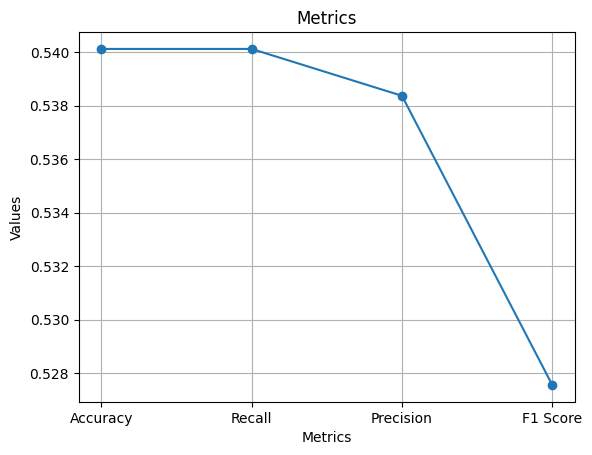

In [54]:
import matplotlib.pyplot as plt

# 각 지표에 대한 값들
accuracy = 0.5401234567901234
recall = 0.5401234567901234
precision = 0.538371697919383
f1 = 0.5275589200708665

# x축 값 (1개의 데이터 포인트만 있는 경우에는 1로 설정)
x = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# y축 값들
y = [accuracy, recall, precision, f1]

# 그래프 그리기
plt.plot(x, y, marker='o')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics')
plt.grid(True)
plt.show()
